# Prediction of Divorce Rates by Applying Factor Analysis

Divorce, the separation of a married couple due to unmet needs or mutual agreement, is a global phenomenon that has garnered significant attention due to its widespread impacts. The divorce rate has risen in many countries over recent decades, with notable variations across regions. For instance, in 2019, the United States recorded a divorce rate of 2.7 per 1,000 population, while Russia reached 4.4 per 1,000. Similarly, Japan and South Korea have seen notable increases, with Japan's rate reaching 1.9 per 1,000 in 2018. African nations, such as South Africa and Lesotho, report rates exceeding 3 per 1,000 population.

This study focuses on predicting divorce by identifying critical factors that contribute to marital dissolution. Logistic regression and random forests are employed to analyze and predict whether a couple is likely to divorce. The study also examines the role of factor analysis in enhancing model predictions and explores cultural and social diversity to ensure the findings are broadly applicable.

The research addresses the following key questions: What are the primary factors leading to divorce? How does the application of factor analysis impact prediction models? How do logistic regression and random forests compare in predicting divorce outcomes?

This report aims to uncover the factors influencing divorce, evaluate the effect of factor analysis on data predictions, and compare the performance of logistic regression and random forests in predicting divorce likelihood.

##1. Import libraries and dataset

**Data description:**

The data used in this study pertains to divorce, containing 55 questions related to divorce, where each of the first 54 questions has a value range from 0 to 4, with 0 being the lowest and 4 being the highest. The last question indicates whether the couple divorced or not, with 1 representing divorce and 0 indicating no divorce. These 55 questions serve as variables in the research, with a total of 170 observations.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

df = pd.read_csv("divorce.csv")
print(np.shape(df))
df.head()

(170, 55)


,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


## 2. Exploratory Data Analysis

###A. Check for missing values

<Axes: >

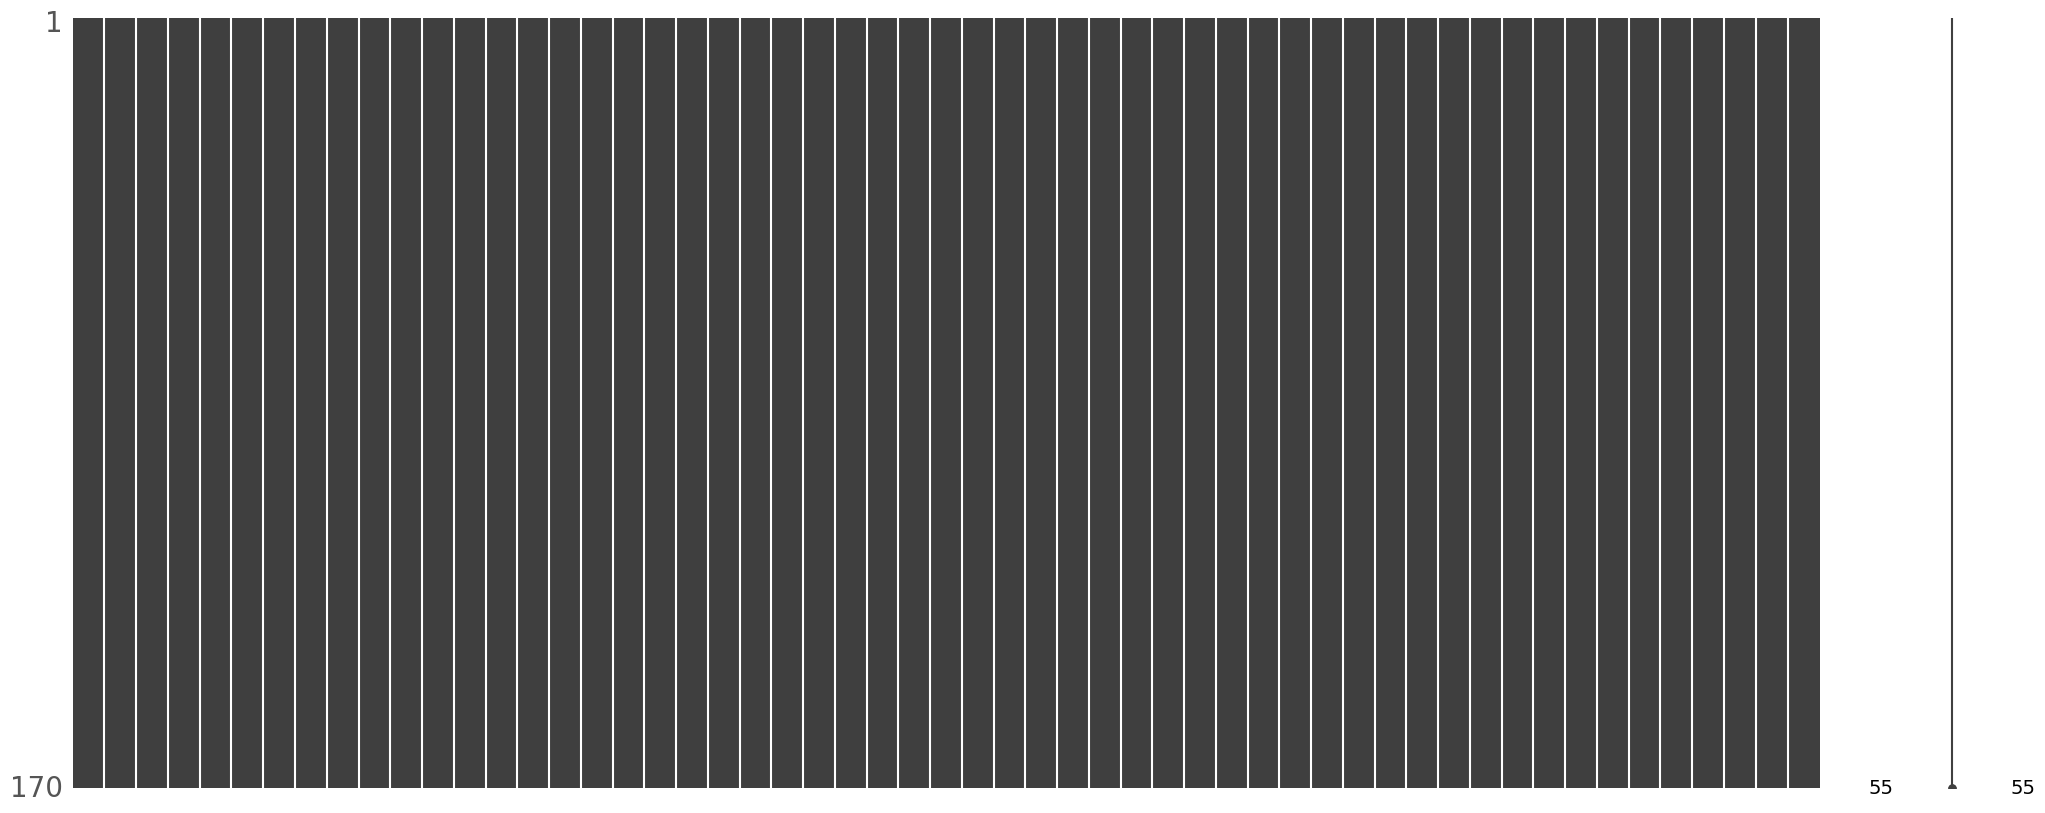

In [ ]:
import missingno as msno
msno.matrix(df)

### B. Visualizing the Lowest and Highest Rating Percentages for Each Variable
This analysis aims to examine the percentage distribution of the lowest and highest ratings for each variable in the dataset. By identifying the proportion of responses that fall at the extremes (0 and 4), we can gain insight into the tendencies or polarization in the data for each question or factor.

In [ ]:
# Descriptive statistics
values = dict()
que_cols = df.drop('Divorce_Y_N',axis=1).columns
for c in que_cols:
    values[c] = dict(round(df[c].value_counts(normalize=True)*100,2))

que_rate_df = pd.DataFrame(values).rename(columns=dict(zip(que_cols,values))).T
que_rate_df = que_rate_df[range(5)]

print(" -> Yellow highlighted cells indicates the max percentage of people given that rating")
print(" -> Green highlighted cells indicates the min percentage of people given that rating")
# Highlighting the max & min value
que_rate_df.style\
      .format('{:.1f}%')\
      .highlight_max(color = 'yellow',axis=1)\
      .highlight_min(color = 'lightgreen',axis=1)

 -> Yellow highlighted cells indicates the max percentage of people given that rating
 -> Green highlighted cells indicates the min percentage of people given that rating


,0,1,2,3,4
Sorry_end,40.6%,5.3%,8.2%,27.6%,18.2%
Ignore_diff,34.7%,13.5%,16.5%,22.4%,12.9%
begin_correct,30.0%,14.1%,15.3%,30.6%,10.0%
Contact,44.1%,7.1%,17.6%,18.8%,12.3%
Special_time,48.2%,5.9%,4.7%,25.9%,15.3%
No_home_time,50.6%,28.8%,17.1%,2.4%,1.2%
2_strangers,67.1%,24.7%,2.9%,2.4%,2.9%
enjoy_holiday,47.6%,5.9%,12.3%,21.8%,12.3%
enjoy_travel,49.4%,4.1%,7.7%,28.8%,10.0%
common_goals,36.5%,10.6%,22.4%,20.0%,10.6%


In [ ]:
df.describe()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


### C. Checking Correlation Between Variables
The correlation results between each variable in the dataset are shown below. Based on the figure, most variables exhibit a high correlation with each other. Therefore, factor analysis will be applied to simplify the data, retaining only the relevant and important variables for use in the modeling process.

Text(0.5, 1.0, 'Correlation value between ratings given for questions')

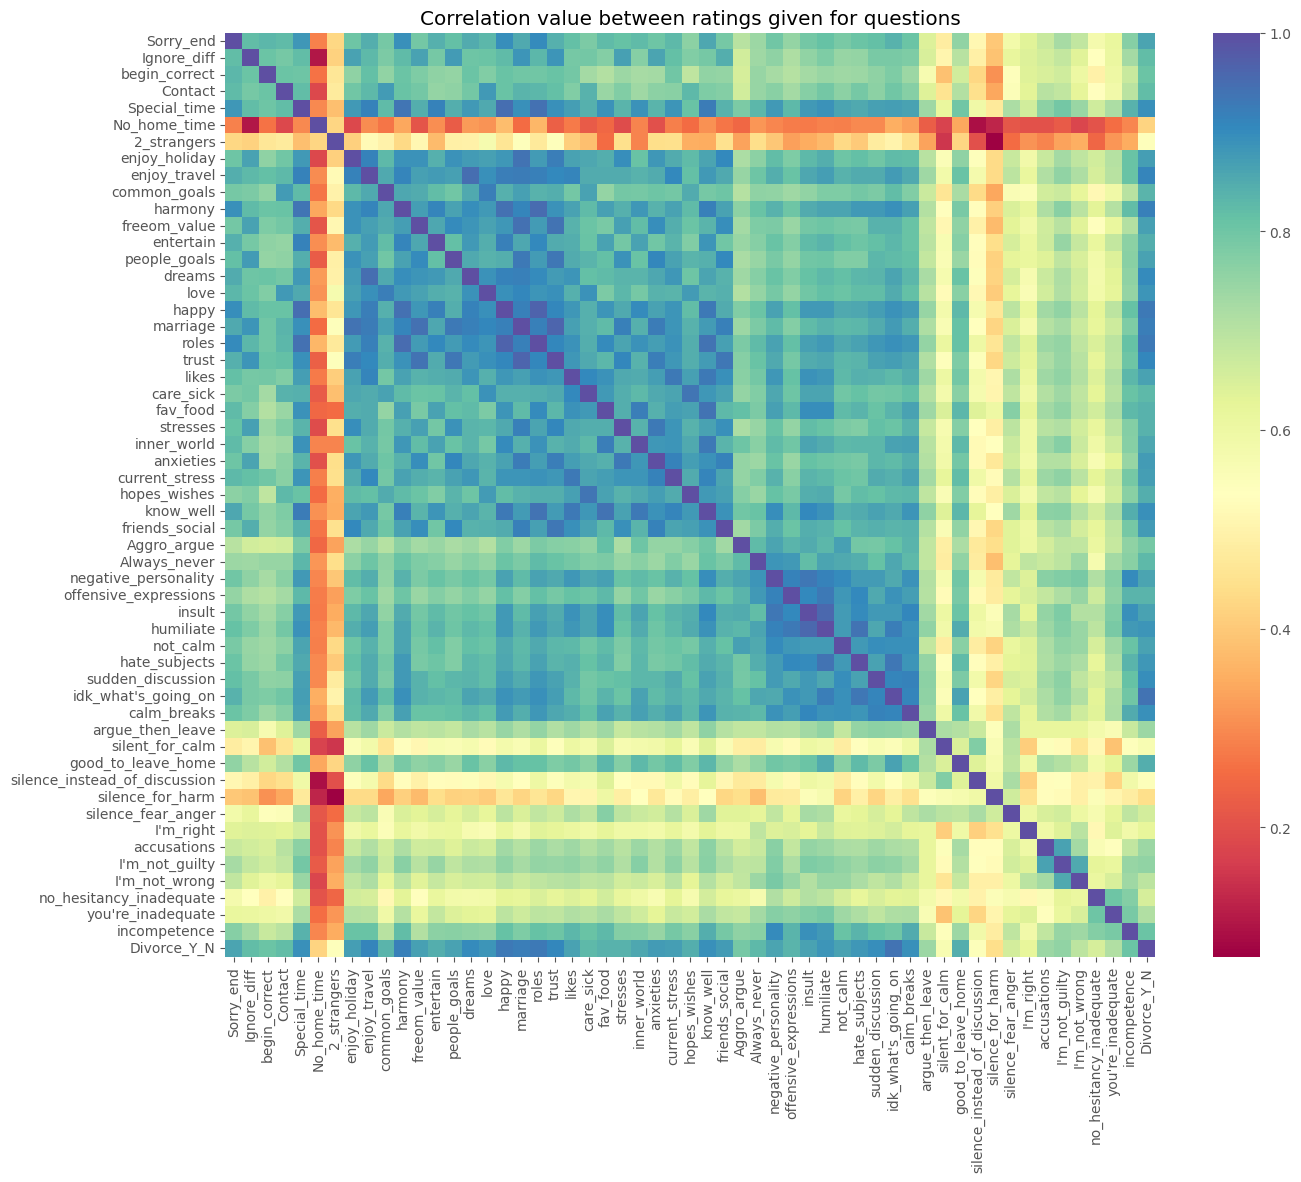

In [ ]:
# Correlation study
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap='Spectral')
plt.title("Correlation value between ratings given for questions")

## 3. Factor Analysis

Factor analysis is a statistical linear model used to explain the variance between observed variables by condensing them into a set of factor variables. The observed variables are modeled as a linear combination of error factors. Factors or latent variables are grouped with several observed variables that exhibit similar responses. Each factor explains a certain amount of variance in the observed variables, which helps in interpreting the data by reducing the number of variables.

In [ ]:
!pip install factor_analyzer

In [ ]:
data = df.drop('Divorce_Y_N',axis=1)
data.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_instead_of_discussion,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence
0,2,2,4,1,0,0,0,0,0,0,...,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,2,3,4,4,4,4,2,2
2,2,2,2,2,1,3,2,1,1,2,...,2,3,2,3,1,1,1,2,2,2
3,3,2,3,2,3,3,3,3,3,3,...,3,2,2,3,3,3,3,2,2,2
4,2,2,1,1,1,1,0,0,0,0,...,2,2,1,2,3,2,2,2,1,0


In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi2,p = calculate_bartlett_sphericity(data)
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  17606.430077903195
p value :  0.0


The p-value < 0.05, correlation is present among the variables with 95% confidence interval

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars,kmo_model = calculate_kmo(data)
print(kmo_model)

0.9643724872807451


KMO score is close to 1, thus applying factor analysis can be effective for the dataset.

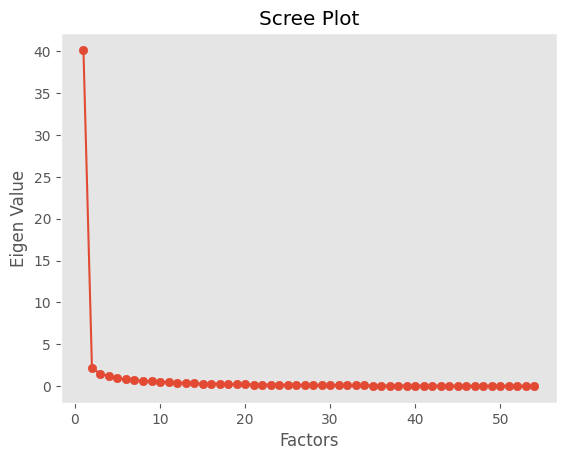

In [ ]:
from factor_analyzer import FactorAnalyzer
n = data.shape[1]
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=n)
fa.fit(data)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,n+1),ev)

plt.plot(range(1,n+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()


The results of the factor analysis application are shown above. In this visualization, the x-axis represents the factors, and the y-axis represents the proportion of the eigenvalue, or the percentage explained by each factor. Based on the figure, most of the data is explained by the first factor, accounting for 40.1%. The second factor and the remaining factors each explain less than 2.2% of the variance.

### Factor Loading - Applying Factor Analysis to the Dataset

The dataset initially consisting of 55 variables has now been reduced to 54 variables after applying factor analysis. This process involves extracting latent factors that explain the variance in the observed variables. Factor analysis simplifies the data by representing it with fewer dimensions while retaining the most significant information. The resulting factors, represented as new variables, provide insights into underlying patterns or relationships within the data.

In [ ]:
fa = FactorAnalyzer(n_factors=5,rotation='varimax')
fa.fit(data)
fa_load = pd.DataFrame(fa.loadings_,index=data.columns)

In [ ]:
def highlight_max(s):
    # Get 5 largest values of the column
    is_large = s.nlargest(10).values
    # Apply style is the current value is among the 5 biggest values
    return ['background-color: yellow' if v in is_large else '' for v in s]

fa_load.sort_values(by=0,ascending=False).style.apply(highlight_max)

,0,1,2,3,4
marriage,0.836865,0.327699,0.292841,0.200275,0.154872
freeom_value,0.828267,0.310767,0.248492,0.167567,0.151989
anxieties,0.805294,0.348423,0.351402,0.059615,0.078859
trust,0.804204,0.380394,0.284953,0.160955,0.201407
people_goals,0.801431,0.333058,0.297584,0.118715,0.132737
Ignore_diff,0.799304,0.312126,0.248137,0.007242,0.249143
enjoy_holiday,0.779464,0.399979,0.314565,0.054577,0.152865
love,0.773158,0.329500,0.264030,0.300530,0.150878
stresses,0.773062,0.367266,0.351396,0.042589,0.140685
common_goals,0.767630,0.352012,0.183620,0.240463,0.133885


In [ ]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                          0          1         2         3         4
Variance          20.309095  12.237168  7.698707  2.489724  1.823363
Proportional Var   0.376094   0.226614  0.142569  0.046106  0.033766
Cumulative Var     0.376094   0.602709  0.745277  0.791383  0.825149


In [ ]:
X = data.copy()
y = df['Divorce_Y_N'].copy()
X.shape, y.shape

((170, 54), (170,))

In [ ]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=5, random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(170, 5)

## 4. LOGISTIC REGRESSION

We split the dataset into 1:1 as training and testing, then use k=5 cross validation on logistic regression model.

The training of the logistic regression model will use training data with varying numbers of factors. A looping approach is used to compare the modeling and evaluation of logistic regression trained with one factor up to 54 factors. The evaluation results of each model can be seen in Figure below. Based on the figure, the optimal number of factors is determined to be between 5 and 14. As the number of factors increases, the difference between training accuracy and test accuracy becomes more significant, and the cross-validation score decreases, leading to overfitting. This indicates that the logistic regression model provides highly accurate predictions for the training data, with a training accuracy of 1, but fails to generalize to new data, as evidenced by the decreasing cross-validation score.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.5,stratify=y,random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((85, 5), (85, 5), (85,), (85,))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

k = 5
model = LogisticRegression()
scores = cross_val_score(model,X_transformed,y,cv=k)
print(f"{k} fold - cross validated scores - {scores}")
print(f"Average accuracy scores - {scores.mean()}")

5 fold - cross validated scores - [0.88235294 1.         1.         1.         1.        ]
Average accuracy scores - 0.9764705882352942


In [ ]:
model = LogisticRegression(random_state=1)
model.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.95      0.98        42

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85



In [ ]:
model.coef_

array([[ 3.08152118,  0.37168413,  0.34749321,  0.15738698, -0.06135314]])

In [ ]:
from sklearn.metrics import accuracy_score

train_acc = []
test_acc = []
cv_scores = []

for f in range(2,54):
    transformer = FactorAnalysis(n_components=f, random_state=0)
    X_transformed = transformer.fit_transform(X)

    model = LogisticRegression()
    scores = cross_val_score(model,X_transformed,y,cv=5)
    cv_score = scores.mean()
    X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.5,stratify=y,random_state=100)

    model.fit(X_train,y_train)

    y_pred_tr = model.predict(X_train)
    y_pred_ts = model.predict(X_test)

    tr_acc = accuracy_score(y_train,y_pred_tr)
    ts_acc = accuracy_score(y_test,y_pred_ts)

    train_acc.append(tr_acc)
    test_acc.append(ts_acc)
    cv_scores.append(cv_score)

Text(0.5, 1.0, 'Factor analysis - Train acc vs Test acc vs CV score')

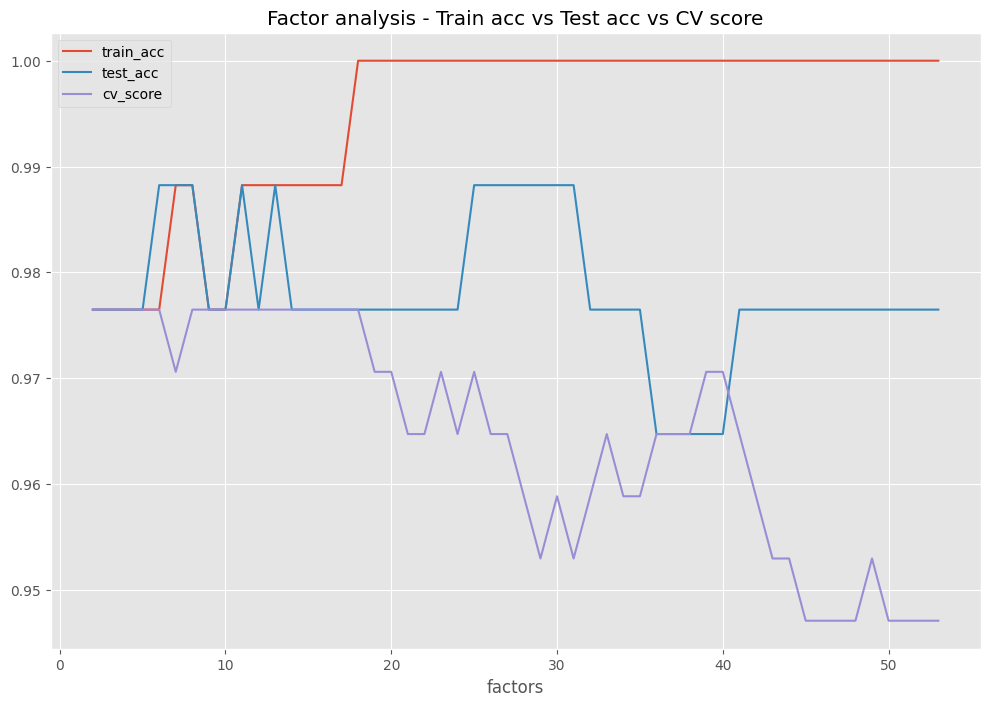

In [ ]:
pd.DataFrame({'factors':range(2,54),
              'train_acc':train_acc,
              'test_acc':test_acc,
              'cv_score':cv_scores}).set_index('factors').plot(figsize=(12,8))
plt.title("Factor analysis - Train acc vs Test acc vs CV score")

## 5. Random Forest

We also applied similar methods by using Random Forest instead.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[43,  0],
       [ 1, 41]])

In [ ]:
from sklearn.metrics import accuracy_score

train_acc = []
test_acc = []
cv_scores = []

for f in range(2,54):
    transformer = FactorAnalysis(n_components=f, random_state=0)
    X_transformed = transformer.fit_transform(X)

    model = RandomForestClassifier()
    scores = cross_val_score(model,X_transformed,y,cv=5)
    cv_score = scores.mean()
    X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.5,stratify=y,random_state=100)

    model.fit(X_train,y_train)

    y_pred_tr = model.predict(X_train)
    y_pred_ts = model.predict(X_test)

    tr_acc = accuracy_score(y_train,y_pred_tr)
    ts_acc = accuracy_score(y_test,y_pred_ts)

    train_acc.append(tr_acc)
    test_acc.append(ts_acc)
    cv_scores.append(cv_score)

Text(0.5, 1.0, 'Factor analysis - Train acc vs Test acc vs CV score')

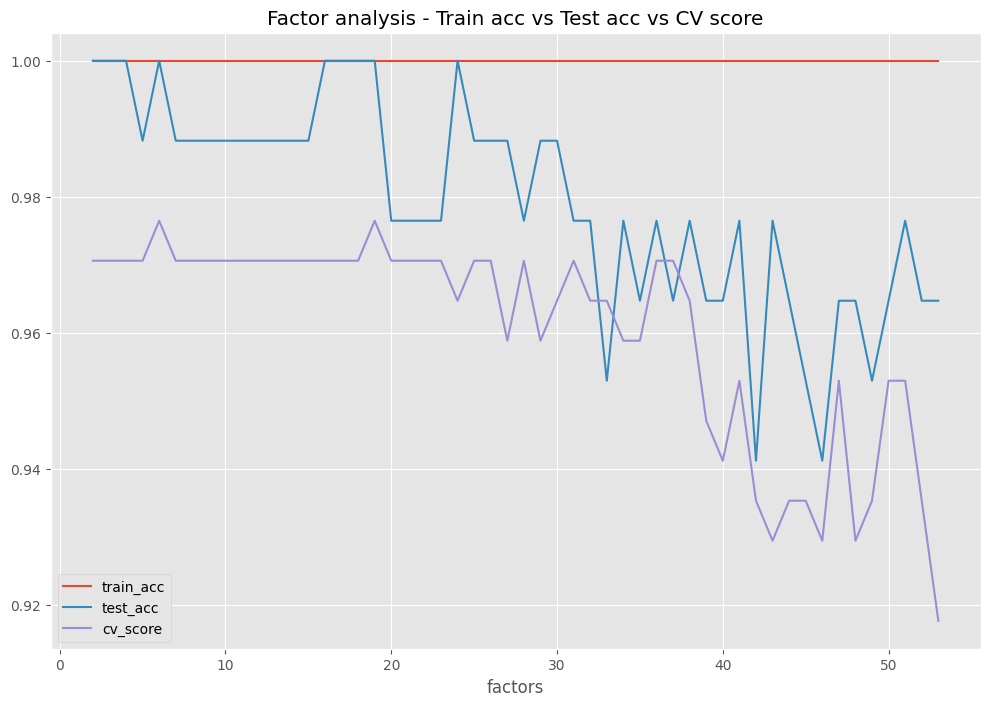

In [ ]:
pd.DataFrame({'factors':range(2,54),
              'train_acc':train_acc,
              'test_acc':test_acc,
              'cv_score':cv_scores}).set_index('factors').plot(figsize=(12,8))
plt.title("Factor analysis - Train acc vs Test acc vs CV score")

Based on the Random Forest model trained with 5 factors, the visualization of the most important variables can be seen in below. According to the figure, the first factor is the most important feature.

Furthermore, the 10 most important variables influencing whether a couple divorces or is identified. Figure 10 represents the top 10 variables for each factor, with the most important variables highlighted in yellow. Only 13 out of the 54 variables are displayed in the figure. However, since the first factor is considered the most significant, the variables marriage, freedom value, anxieties, trust, people goals, ignore different, enjoy holiday, love, stresses, and common goals are identified as the key factors influencing the likelihood of divorce.

<BarContainer object of 5 artists>

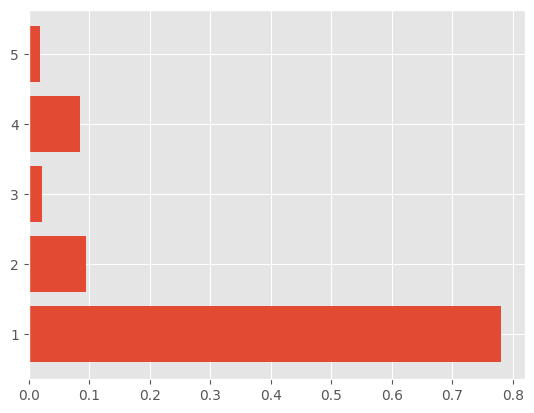

In [ ]:
from sklearn.metrics import accuracy_score

train_acc = []
test_acc = []
cv_scores = []
f = 5

transformer = FactorAnalysis(n_components=f, random_state=0)
X_transformed = transformer.fit_transform(X)

model = RandomForestClassifier()
scores = cross_val_score(model,X_transformed,y,cv=5)
cv_score = scores.mean()
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.5,stratify=y,random_state=100)

model.fit(X_train,y_train)

y_pred_tr = model.predict(X_train)
y_pred_ts = model.predict(X_test)

tr_acc = accuracy_score(y_train,y_pred_tr)
ts_acc = accuracy_score(y_test,y_pred_ts)

train_acc.append(tr_acc)
test_acc.append(ts_acc)
cv_scores.append(cv_score)
plt.barh([1,2,3,4,5], model.feature_importances_)

## 6. Summary

1. After conducting the Kaiser-Meyer-Olkin (KMO) test, which measures the proportion of variance that might be common among other variables, a value of 0.96437 was obtained. This indicates that the data is suitable for factor analysis.

2. The optimal number of factors for the logistic regression model ranges from 5 to 14, as it provides the highest and most stable cross-validation scores.

3. The optimal number of factors for the Random Forest model is 5 or more. The 10 most important variables influencing whether a couple divorces or not are marriage, freedom value, anxieties, trust, people goals, ignore different, enjoy holiday, love, stresses, and common goals.

4. A higher number of factors does not necessarily lead to better modeling results. Divorce data exhibits high correlations between variables, meaning that a large number of factors may reflect similar issues, ultimately causing the model to overfit.